This notebook explains how to calculate biases to galaxy clustering auto-spectra, using parallelization in NERSC 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import biases
import utils
import healpy as hp
from scipy.interpolate import interp1d

import os
# Hack to get Latex working on Perlmutter. Due to Joe de Rose
os.environ['PATH'] = '/global/common/sw/cray/sles15/x86_64/texlive/live/gcc/8.2.0/tiozj27/bin/x86_64-linux/:{}'.format(os.environ['PATH'])

plt.style.use('/global/u1/a/ab2368/plt_styles/JCAP_paper.mplstyle')
plots_dir = '/global/u1/a/ab2368/varying_dndzs/Varying_dndzs/paper/63ffea69c50c290da6f23d0e/plots/'

%matplotlib inline
%load_ext autoreload
%autoreload 2

/tmp/ipykernel_27160/206491977.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


#### Setup

Define the scenario we want to consider

In [3]:
sigma = 0.06 # Standard deviation of the fiducial dndz
z_mean = 0.59 # Central redshift of the fiducial dndz

# Set the range for the integrals over r. If this changes, the normalization of phi(r) will need to be changed too
z_min_int = 0.005
z_max_int = z_mean+2

# Now characterize the perturbations to the dndz
error_on_meanz = 0.017*(1+z_mean) # Error on RedMaGiC mean z, from arXiv:1708.01536
sigma_zshift = error_on_meanz # Standard deviation of the shifts in the central redshift of the distribution
sigma_zwidth = 0 #sigma/10. # Standard deviation of the variations in the width of the distribution

We also need to define the Lagrangian bias parameters for the galaxy power spectrum (if you want to use a different prescription, it's easy to modify the code to do so)

In [4]:
#UNIT-redmagic bias parameters from 2101.11014
#         b1,    b2,    bs2,   bnabla2, SN
bvec = [0.786, 0.583, -0.406, -0.512, 1755]

# Non-trivial perturbation power spectrum

Generate a template of shifts in mean redshift of the dndz

In [5]:
alpha = -2 # The spectral index of the perturbation Cls
lmax_pert = 100 # The lmax of the perturbations we inject
nside = 128

In [ ]:
zshift_template = utils.generate_template(nside, alpha, sigma_zshift, lmax_pert)
temp_exp = biases.experiment(sigma, z_mean, sigma_zshift, sigma_zwidth, zshift_template, bvec)
filename = '/pscratch/sd/a/ab2368/data/redmagic_alpha{}_lmaxpert{}_sigmazshift{}_nside{}'.format(alpha, lmax_pert, sigma_zshift, nside)
# We save the key properties to file so they can be load by the parallel processes we're about to create
temp_exp.save_properties(filename)

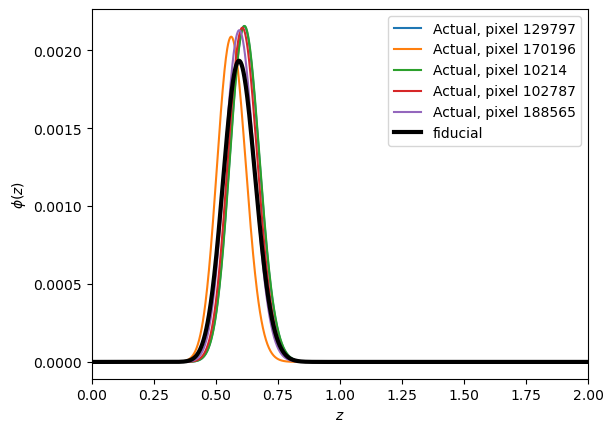

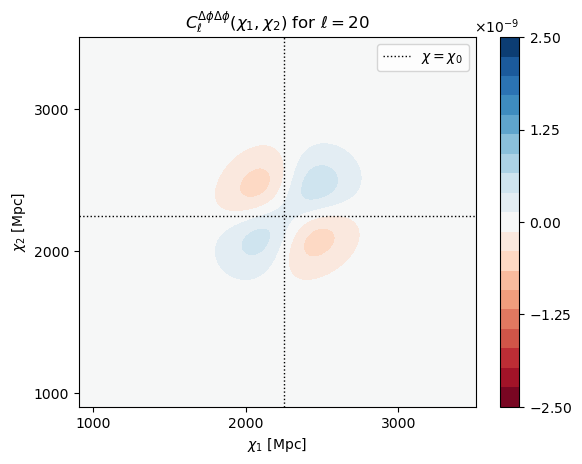

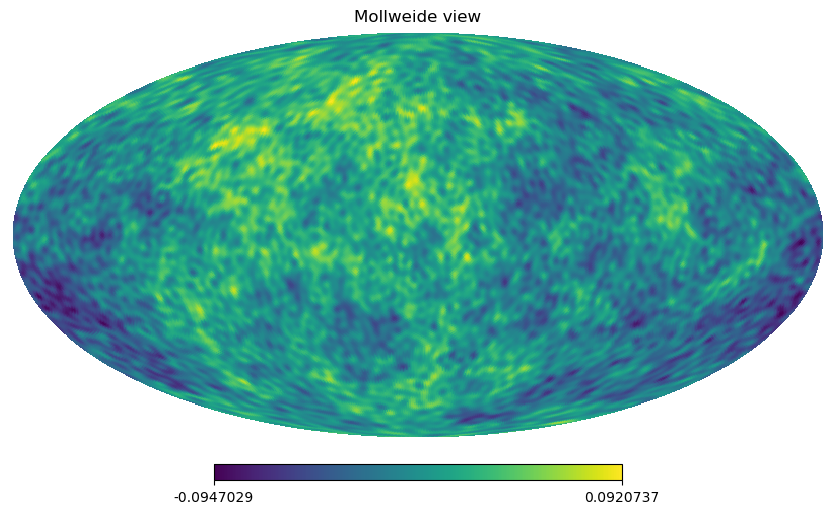

In [52]:
temp_exp.plot_realizations()
plt.show()
temp_exp.plot_ClDphi_vs_chi_chiprime_2D(20)
plt.show()
hp.mollview(temp_exp.zmean_shifts_array, title=r'$\Delta z$')

Now calculate all the relevant terms, and some approximations

In [ ]:
loaded_exp = biases.compute_contributions(filename)

(0.001, 1)

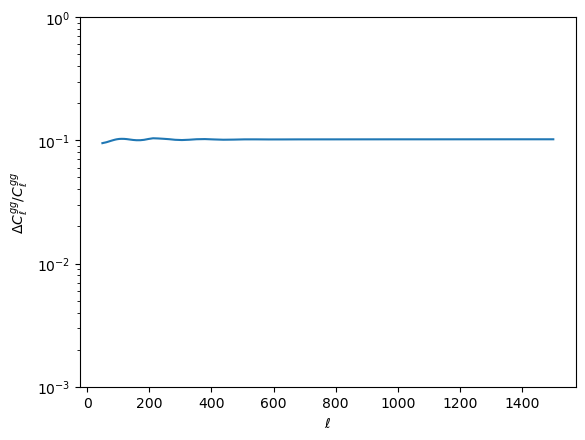

In [12]:
plt.plot(loaded_exp.ells, loaded_exp.conv_bias/loaded_exp.unbiased_clgg)

plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\Delta C^{gg}_\ell/ C^{gg}_\ell$')
plt.ylim([1e-3,1])

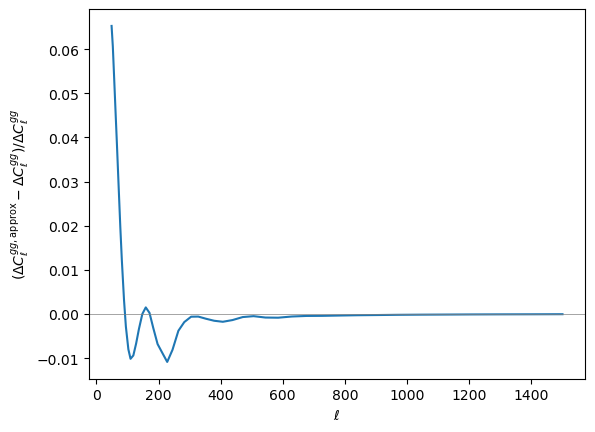

In [17]:
plt.plot(loaded_exp.ells, (loaded_exp.analytic_mcbias_via_variance-loaded_exp.conv_bias)/loaded_exp.conv_bias)

plt.yscale('linear')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$(\Delta C^{gg, \mathrm{approx}}_\ell - \Delta C^{gg}_\ell)/ \Delta C^{gg}_\ell$')
plt.axhline(0, lw=0.5, color='gray')

### More cases

In [53]:
sigma_zshifts = np.array([0.017*(1+z_mean), 0.01, 0.006, 0.003]) #np.array([2, 1, 0.1])*error_on_meanz
alphas = np.array([-2]) #np.array([-2, -1, 0])
lmax_perts = np.array([100]) # The lmax of the perturbations we inject
sigmas = np.array([0.09]) # The width of the fiducial distribution
nside = 128
title = 'general' #'redmagic' 'redmagic_wn

In [54]:
for alpha in alphas:
    for sigma_zshift in sigma_zshifts:
        for lmax_pert in lmax_perts:
            for sigma in sigmas:
                zshift_template = utils.generate_template(nside, alpha, sigma_zshift, lmax_pert)
                temp_exp = biases.experiment(sigma, z_mean, sigma_zshift, sigma_zwidth, zshift_template, bvec)
                filename = '/pscratch/sd/a/ab2368/data/{}_alpha{}_lmaxpert{}_sigmazshift{}_nside{}_sigma{}'.format(title, alpha, lmax_pert, sigma_zshift, nside, sigma)
                temp_exp.save_properties(filename)
                temp_exp = biases.compute_contributions(filename)

Completed 0%
Completed 1%
Completed 3%
Completed 4%
Completed 5%
Completed 7%
Completed 8%
Completed 9%
Completed 11%
Completed 12%
Completed 14%
Completed 15%
Completed 16%
Completed 18%
Completed 19%
Completed 20%
Completed 22%
Completed 23%
Completed 24%
Completed 26%
Completed 27%
Completed 28%
Completed 30%
Completed 31%
Completed 32%
Completed 34%
Completed 35%
Completed 37%
Completed 38%
Completed 39%
Completed 41%
Completed 42%
Completed 43%
Completed 45%
Completed 46%
Completed 47%
Completed 49%
Completed 50%
Completed 51%
Completed 53%
Completed 54%
Completed 55%
Completed 57%
Completed 58%
Completed 60%
Completed 61%
Completed 62%
Completed 64%
Completed 65%
Completed 66%
Completed 68%
Completed 69%
Completed 70%
Completed 72%
Completed 73%
Completed 74%
Completed 76%
Completed 77%
Completed 78%
Completed 80%
Completed 81%
Completed 83%
Completed 84%
Completed 85%
Completed 87%
Completed 88%
Completed 89%
Completed 91%
Completed 92%
Completed 93%
Completed 95%
Completed 96%


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


Working on l=49
Working on l=53
Working on l=57
Working on l=62
Working on l=66
Working on l=71
Working on l=77
Working on l=82
Working on l=89
Working on l=95
Working on l=103
Working on l=110
Working on l=119
Working on l=128
Working on l=137
Working on l=148
Working on l=159
Working on l=171
Working on l=183
Working on l=197
Working on l=212
Working on l=228
Working on l=245
Working on l=264
Working on l=283
Working on l=305
Working on l=328
Working on l=352
Working on l=379
Working on l=407
Working on l=438
Working on l=471
Working on l=506
Working on l=544
Working on l=585
Working on l=629
Working on l=676
Working on l=727
Working on l=782
Working on l=840
Working on l=903
Working on l=971
Working on l=1044
Working on l=1122
Working on l=1207
Working on l=1297
Working on l=1395
Working on l=1500
Using mode full
Working on l=49
Working on l=53
Working on l=57
Working on l=62
Working on l=66
Working on l=71
Working on l=77
Working on l=82
Working on l=89
Working on l=95
Working on l

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


Working on l=49
Working on l=53
Working on l=57
Working on l=62
Working on l=66
Working on l=71
Working on l=77
Working on l=82
Working on l=89
Working on l=95
Working on l=103
Working on l=110
Working on l=119
Working on l=128
Working on l=137
Working on l=148
Working on l=159
Working on l=171
Working on l=183
Working on l=197
Working on l=212
Working on l=228
Working on l=245
Working on l=264
Working on l=283
Working on l=305
Working on l=328
Working on l=352
Working on l=379
Working on l=407
Working on l=438
Working on l=471
Working on l=506
Working on l=544
Working on l=585
Working on l=629
Working on l=676
Working on l=727
Working on l=782
Working on l=840
Working on l=903
Working on l=971
Working on l=1044
Working on l=1122
Working on l=1207
Working on l=1297
Working on l=1395
Working on l=1500
Using mode full
Working on l=49
Working on l=53
Working on l=57
Working on l=62
Working on l=66
Working on l=71
Working on l=77
Working on l=82
Working on l=89
Working on l=95
Working on l

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


Working on l=49
Working on l=53
Working on l=57
Working on l=62
Working on l=66
Working on l=71
Working on l=77
Working on l=82
Working on l=89
Working on l=95
Working on l=103
Working on l=110
Working on l=119
Working on l=128
Working on l=137
Working on l=148
Working on l=159
Working on l=171
Working on l=183
Working on l=197
Working on l=212
Working on l=228
Working on l=245
Working on l=264
Working on l=283
Working on l=305
Working on l=328
Working on l=352
Working on l=379
Working on l=407
Working on l=438
Working on l=471
Working on l=506
Working on l=544
Working on l=585
Working on l=629
Working on l=676
Working on l=727
Working on l=782
Working on l=840
Working on l=903
Working on l=971
Working on l=1044
Working on l=1122
Working on l=1207
Working on l=1297
Working on l=1395
Working on l=1500
Using mode full
Working on l=49
Working on l=53
Working on l=57
Working on l=62
Working on l=66
Working on l=71
Working on l=77
Working on l=82
Working on l=89
Working on l=95
Working on l

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


Working on l=49
Working on l=53
Working on l=57
Working on l=62
Working on l=66
Working on l=71
Working on l=77
Working on l=82
Working on l=89
Working on l=95
Working on l=103
Working on l=110
Working on l=119
Working on l=128
Working on l=137
Working on l=148
Working on l=159
Working on l=171
Working on l=183
Working on l=197
Working on l=212
Working on l=228
Working on l=245
Working on l=264
Working on l=283
Working on l=305
Working on l=328
Working on l=352
Working on l=379
Working on l=407
Working on l=438
Working on l=471
Working on l=506
Working on l=544
Working on l=585
Working on l=629
Working on l=676
Working on l=727
Working on l=782
Working on l=840
Working on l=903
Working on l=971
Working on l=1044
Working on l=1122
Working on l=1207
Working on l=1297
Working on l=1395
Working on l=1500
Using mode full
Working on l=49
Working on l=53
Working on l=57
Working on l=62
Working on l=66
Working on l=71
Working on l=77
Working on l=82
Working on l=89
Working on l=95
Working on l

Visualize some templates

In [437]:
alphas = np.array([-2, -1])
lmax_pert = 100

plt.clf()
fig, (ax, ax2) = plt.subplots(ncols=2,figsize=(10, 3))

fig.subplots_adjust(wspace=0.1)

alpha=alphas[0]
filename = '/pscratch/sd/a/ab2368/data/{}_alpha{}_lmaxpert{}_sigmazshift{}_nside{}_sigma{}'.format(title, alpha, lmax_pert, sigma_zshift, nside, sigma)
loaded_exp = biases.load_from_file(filename)
a = loaded_exp.zmean_shifts_array
plt.axes(ax)
hp.mollview(a, title=r"$\alpha=$"+str(alphas[0]), min=temp_plot_min, max=temp_plot_max, cbar=False, hold=True, cmap='PuOr')

alpha=alphas[1]
filename = '/pscratch/sd/a/ab2368/data/{}_alpha{}_lmaxpert{}_sigmazshift{}_nside{}_sigma{}'.format(title, alpha, lmax_pert, sigma_zshift, nside, sigma)
loaded_exp = biases.load_from_file(filename)
b = loaded_exp.zmean_shifts_array
plt.axes(ax2)
im = hp.mollview(b, title=r"$\alpha=$"+str(alphas[1]), min=temp_plot_min, max=temp_plot_max, cbar=False, hold=True, cmap='PuOr')

p0 = ax.get_position().get_points().flatten()
p1 = ax2.get_position().get_points().flatten()
ax_cbar = fig.add_axes([0.414, 0.05, 0.2, 0.04])

norm = mpl.colors.Normalize(vmin=temp_plot_min, vmax=temp_plot_max)
sm = plt.cm.ScalarMappable(cmap='PuOr', norm=norm)
sm.set_array([])

cb = plt.colorbar(sm, cax=ax_cbar, orientation='horizontal', ticks=np.linspace(temp_plot_min, temp_plot_max, 5))
cb.ax.set_title(r'$z_{\mathrm{shift}}$')
plt.savefig(plots_dir+'fig_z_shift_templates.pdf', bbox_inches='tight', dpi=600)

Plot the projection anisotropy spectrum

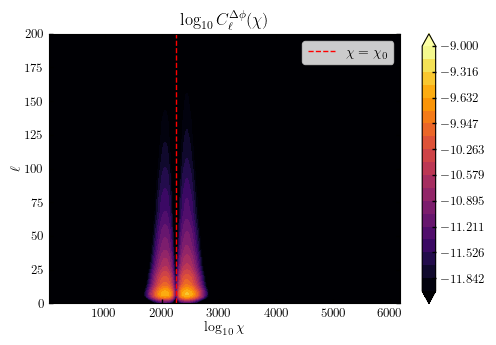

In [269]:
from scipy.ndimage.filters import gaussian_filter

def plot_ClDphi_of_chi_2D(exp, lprime_max=100):
    '''
    Plot log C_l^{\Delta \phi}(\chi,\chi) against l and  \mathrm{log}_{10}\,\chi
    '''
    X, Y = np.meshgrid(np.arange(len(exp.chi_array)), np.arange(exp.lmax + 1))
    Z = np.log10(np.diagonal(exp.Cl_deltap_of_chi1_chi2, axis1=1, axis2=2))
    # Set the log of 0 to a tiny negative number
    Z[np.diagonal(exp.Cl_deltap_of_chi1_chi2, axis1=1, axis2=2) == 0] = -1e100

    contours = np.linspace(-12, -9, 20)

    # Smooth array with a Gaussian filter for plotting purposes
    Z_smoothed = gaussian_filter(Z, sigma=3)
    plt.contourf(X, Y, Z_smoothed, levels=contours, cmap='inferno', extend='both')

    ax = plt.gca()
    ax.axvline(np.where(exp.chi_array > exp.chi_mean_fid)[0][0], color='r', ls='--', lw=1,
               label=r'$\chi=\chi_0$')
    ax.set_ylim([0, lprime_max])

    plt.xlabel(r'$\mathrm{log}_{10}\,\chi$')
    plt.ylabel(r'$\ell$')

    label_locs = np.arange(1000, 7000, 1000, dtype=int)
    ax.set_xticks(utils.find_closest_indices(exp.chi_array, label_locs))
    ax.set_xticklabels(label_locs.astype('str'))
    plt.legend(facecolor='white', framealpha=0.8, frameon=True)

    plt.title(r'$\mathrm{log}_{10} \, C_\ell^{\Delta \phi}(\chi)$')
    plt.colorbar(location='right')
    plt.show()

plot_ClDphi_of_chi_2D(loaded_exp, 200)

The mode-coupling term in galaxy clustering

In [8]:
title = 'general' #'redmagic' 'redmagic_wn
alphas = np.array([-2])
sigmas = np.array([0.5, 1, 1.5, 2]) * 0.06 # The width of the fiducial distribution
sigma_zshifts = np.array([0.017*(1+z_mean), 0.01, 0.006, 0.003]) #np.array([2, 1, 0.1])*error_on_meanz

bias_fom = np.zeros((len(sigma_zshifts), len(alphas), len(sigmas)))
signal_fom = np.zeros((len(sigma_zshifts), len(alphas), len(sigmas)))
mc_fom = np.zeros((len(sigma_zshifts), len(alphas), len(sigmas)))

i = 0
for sigma_zshift in sigma_zshifts:
    j=0
    for alpha in alphas:
        k=0
        for sigma in sigmas:
            filename = '/pscratch/sd/a/ab2368/data/{}_alpha{}_lmaxpert{}_sigmazshift{}_nside{}_sigma{}'.format(title, alpha, lmax_pert, sigma_zshift, nside, sigma)
            loaded_exp = biases.load_from_file(filename)

            mc_fom[i,j,k] = np.trapz(loaded_exp.conv_bias, loaded_exp.ells) / np.trapz(np.ones_like(loaded_exp.ells), loaded_exp.ells)
            signal_fom[i,j,k] = np.trapz(loaded_exp.unbiased_clgg, loaded_exp.ells) / np.trapz(np.ones_like(loaded_exp.ells), loaded_exp.ells)
            bias_fom[i,j,k] = np.trapz(loaded_exp.conv_bias/loaded_exp.unbiased_clgg, loaded_exp.ells) / np.trapz(np.ones_like(loaded_exp.ells), loaded_exp.ells)
            k+=1
        j+=1
    i+=1

(0.0, 0.14)

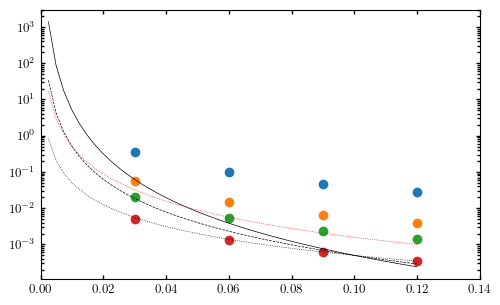

In [13]:
alphas = np.array([-2])
sigmas = np.array([0.5, 1, 1.5, 2]) * 0.06 # The width of the fiducial distribution
sigma_zshifts = np.array([0.017*(1+z_mean), 0.01, 0.006, 0.003]) #np.array([2, 1, 0.1])*error_on_meanz

i = 0
for sigma_zshift in sigma_zshifts:
    j=0
    for alpha in alphas:
        k=0
        for sigma in sigmas:
            plt.scatter(sigma, bias_fom[i,j,k], color="C{}".format(i))
            k+=1
        j+=1
    i+=1

xs = np.linspace(0,0.12)
plt.plot(xs, 5e-8*xs**-4, lw=0.5, color='k')
plt.plot(xs, 5e-7*xs**-3, lw=0.5, color='k', ls='--')
plt.plot(xs, 5e-6*xs**-2, lw=0.5, color='k', ls=':')
plt.plot(xs, 5e-6*xs**-(5/2), lw=0.5, color='r', ls=':')

plt.yscale('log')
plt.xlim([0,0.14])

In [24]:
'''
sigma_zshift_labels = np.array([r'$\sigma(\chi_\mathrm{shift})= 27\times 10^{-3}$', r'$\sigma(\chi_\mathrm{shift})= 10 \times 10^{-3}$',
                                r'$\sigma(\chi_\mathrm{shift})=6 \times 10^{-3}$', r'$\sigma(\chi_\mathrm{shift})= 3\times 10^{-3}$'])
'''
sigma_zshift_labels = np.array([r'$2.7$', r'$1.0$',
                                r'$0.6$', r'$0.3$'])

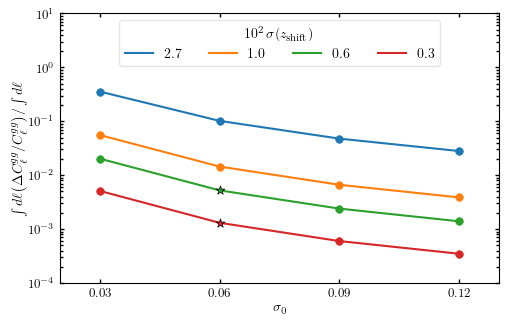

In [47]:
i=0
for sigma_zshift, label in zip(sigma_zshifts, sigma_zshift_labels):
    plt.plot(sigmas, bias_fom[i,0,:], color="C{}".format(i), label=label)
    i+=1
    
    
i = 0
for sigma_zshift in sigma_zshifts:
    j=0
    for alpha in alphas:
        k=0
        for sigma in sigmas:
            if k==0:
                label = None
            else:
                label=None
            if sigma==0.06 and sigma_zshift==0.003:
                marker='*'
                markersize = 45
                edgecolors='k'
            elif sigma==0.06 and sigma_zshift==0.006:
                marker='*'
                markersize = 45
                edgecolors='k'
            else:
                marker='o'
                markersize=30
                edgecolors=None
            plt.scatter(sigma, bias_fom[i,j,k], color="C{}".format(i), marker=marker, s=markersize, edgecolors=edgecolors, zorder=1000, linewidths=0.5)
            k+=1
        j+=1
    i+=1



plt.xticks(np.linspace(0,0.15,6), np.linspace(0,0.15,6).astype(str))
plt.yscale('log')
plt.xlim([0.02,0.13])
plt.ylim([1e-4,10])

plt.legend(loc='upper center', ncols=len(sigma_zshifts), frameon=True, title=r'$ 10^{2}\,\sigma(z_\mathrm{shift})$')
plt.xlabel(r'$\sigma_0$')
plt.ylabel(r'$\int d\ell \big(\Delta C^{gg}_\ell/ C^{gg}_\ell \big)/ \int d\ell$')
plt.savefig(plots_dir+'fig_mcbias_vs_sigma.pdf', bbox_inches='tight', dpi=600)

Or plot the angular power spectrum directly

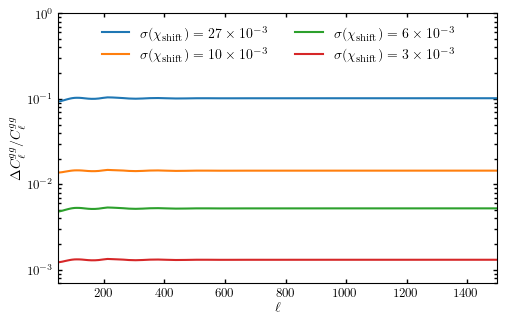

In [30]:
alphas = np.array([-2])
sigma_zshifts = np.array([0.017*(1+z_mean), 0.01, 0.006, 0.003]) #np.array([2, 1, 0.1])*error_on_meanz

sigma_zshift_labels = np.array([r'\sigma(\chi_\mathrm{shift})= 27\times 10^{-3}', r'\sigma(\chi_\mathrm{shift})= 10 \times 10^{-3}',
                                r'\sigma(\chi_\mathrm{shift})=6 \times 10^{-3}', r'\sigma(\chi_\mathrm{shift})= 3\times 10^{-3}'])
alphas_ls = np.array(['-', '-.', ':'])
alphas_labels = np.array([r'\alpha={}'.format(alphas[0])]) #np.array([r'\alpha={}'.format(alphas[0]), r'\alpha={}'.format(alphas[1]), r'\alpha={}'.format(alphas[2])])

i=0
for sigma_zshift, sigma_zshift_label in zip(sigma_zshifts, sigma_zshift_labels):
    for alpha, ls, alphas_label in zip(alphas, alphas_ls, alphas_labels):
        filename = '/pscratch/sd/a/ab2368/data/{}_alpha{}_lmaxpert{}_sigmazshift{}_nside{}_sigma{}'.format(title, alpha, lmax_pert, sigma_zshift, nside, sigma)
        loaded_exp = biases.load_from_file(filename)
        plt.plot(loaded_exp.ells, loaded_exp.conv_bias/loaded_exp.unbiased_clgg,
                 color="C{}".format(i), ls=ls, label=r'${}$'.format(sigma_zshift_label))
    i+=1

plt.yscale('log')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\Delta C^{gg}_\ell/ C^{gg}_\ell$')
plt.xlim([50, 1500])
plt.ylim([7e-4, 1])
plt.legend(ncol=2, loc='upper center')

plt.savefig(plots_dir+'fig_gc_mcbias.pdf', bbox_inches='tight', dpi=600)

The additive term

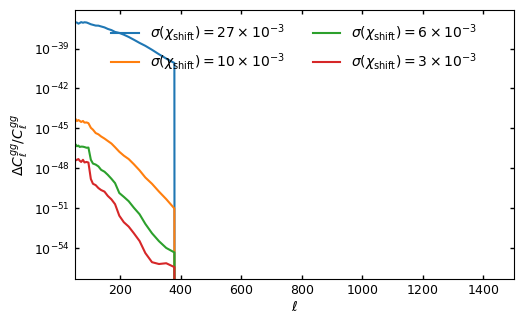

In [46]:
alphas = np.array([-2])
sigma_zshifts = np.array([0.017*(1+z_mean), 0.01, 0.006, 0.003]) #np.array([2, 1, 0.1])*error_on_meanz

sigma_zshift_labels = np.array([r'\sigma(\chi_\mathrm{shift})= 27\times 10^{-3}', r'\sigma(\chi_\mathrm{shift})= 10 \times 10^{-3}',
                                r'\sigma(\chi_\mathrm{shift})=6 \times 10^{-3}', r'\sigma(\chi_\mathrm{shift})= 3\times 10^{-3}'])
alphas_ls = np.array(['-', '-.', ':'])
alphas_labels = np.array([r'\alpha={}'.format(alphas[0])]) #np.array([r'\alpha={}'.format(alphas[0]), r'\alpha={}'.format(alphas[1]), r'\alpha={}'.format(alphas[2])])

i=0
for sigma_zshift, sigma_zshift_label in zip(sigma_zshifts, sigma_zshift_labels):
    for alpha, ls, alphas_label in zip(alphas, alphas_ls, alphas_labels):
        filename = '/pscratch/sd/a/ab2368/data/{}_alpha{}_lmaxpert{}_sigmazshift{}_nside{}'.format(title, alpha, lmax_pert, sigma_zshift, nside)
        loaded_exp = biases.load_from_file(filename)
        plt.plot(loaded_exp.ells, loaded_exp.additive_bias/loaded_exp.unbiased_clgg,
                 color="C{}".format(i), ls=ls, label=r'${}$'.format(sigma_zshift_label))
    i+=1

plt.yscale('log')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\Delta C^{gg}_\ell/ C^{gg}_\ell$')
plt.xlim([50, 1500])
#plt.ylim([7e-4, 1])
plt.legend(ncol=2, loc='upper center')

plt.savefig(plots_dir+'fig_gc_addbias.pdf', bbox_inches='tight', dpi=600)

Assess the validity of the analytic approximation to the mode-coupling bias

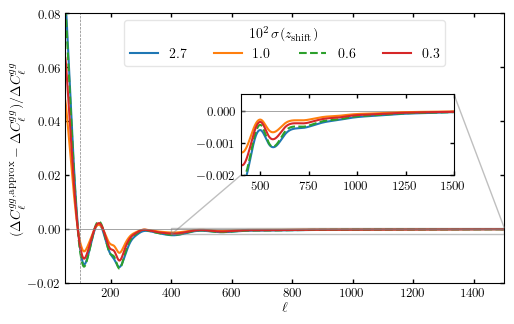

In [46]:
alphas = np.array([-2])
sigma = 0.06
sigma_zshifts = np.array([0.017*(1+z_mean), 0.01, 0.006, 0.003])

sigma_zshift_labels = np.array([r'$2.7$', r'$1.0$',
                                r'$0.6$', r'$0.3$'])

sigma_zshift_ls = np.array(['-', '-', '--', '-'])
alphas_labels = np.array([r'\alpha={}'.format(alphas[0])]) #np.array([r'\alpha={}'.format(alphas[0]), r'\alpha={}'.format(alphas[1]), r'\alpha={}'.format(alphas[2])])

# Limits
lmin_plot = 50
lmax_plot = 1500
plot_ells = np.arange(lmin_plot, lmax_plot)

# Create inset axes
axis = plt.gca()
axin = axis.inset_axes([0.4, 0.4, 1.618*0.3, 0.3])# Plot the data on the inset axis and zoom in on the important part
axin.set_xlim(400, 1500)
axin.set_ylim(-0.002, 0.0005)
axis.indicate_inset_zoom(axin)
axin.axhline(0, lw=0.5, color='gray')

i=0
for sigma_zshift, sigma_zshift_label, ls in zip(sigma_zshifts, sigma_zshift_labels, sigma_zshift_ls):
    for alpha, alphas_label in zip(alphas, alphas_labels):
        filename = '/pscratch/sd/a/ab2368/data/{}_alpha{}_lmaxpert{}_sigmazshift{}_nside{}_sigma{}'.format(title, alpha, lmax_pert, sigma_zshift, nside, sigma)
        loaded_exp = biases.load_from_file(filename)

        # Interpolate to smooth
        approx_ratio_interp = interp1d(loaded_exp.ells, (loaded_exp.analytic_mcbias_via_variance-loaded_exp.conv_bias)/loaded_exp.conv_bias, kind='cubic')

        plt.plot(plot_ells, approx_ratio_interp(plot_ells), color="C{}".format(i), ls=ls, label=r'${}$'.format(sigma_zshift_label))
        axin.plot(plot_ells, approx_ratio_interp(plot_ells), color="C{}".format(i), ls=ls)
    i+=1

plt.yscale('linear')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$(\Delta C^{gg, \mathrm{approx}}_\ell - \Delta C^{gg}_\ell)/ \Delta C^{gg}_\ell$')
plt.axhline(0, lw=0.5, color='gray')
plt.axvline(lmax_pert, ls='--', lw=0.5, color='gray')
plt.xlim([lmin_plot, lmax_plot])
plt.ylim([-0.02, 0.08])
plt.legend(ncol=len(sigma_zshifts), loc='upper center', frameon=True, title=r'$10^{2}\,\sigma(z_\mathrm{shift})$')

plt.savefig(plots_dir+'fig_analytic_approx.pdf', bbox_inches='tight', dpi=600)

Let's check the impact of varying the lmax of the projection anisotropy, fixing the variance of the templates to the redmagic value

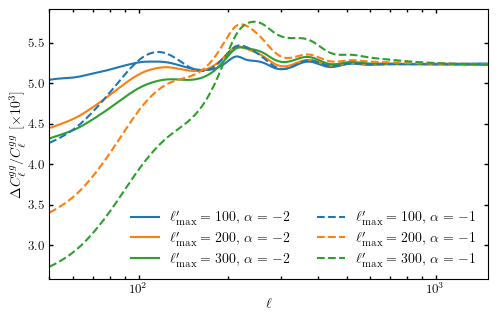

In [23]:
sigma_zshifts = np.array([0.006]) # The redgmagic value
alphas = np.array([-2, -1])
lmax_perts = np.array([100, 200, 300]) # The lmax of the perturbations we inject
nside = 128
title = 'general' 

# Limits
lmin_plot = 50
lmax_plot = 1500
plot_ells = np.arange(lmin_plot, lmax_plot)

sigma_zshift_labels = None
alphas_ls = np.array(['-', '--'])
alphas_labels = np.array([r'\alpha={}'.format(alphas[0]), r'\alpha={}'.format(alphas[1])])
lmax_pert_labels = np.array([r"\ell'_{\mathrm{max}}="+str(lmax_perts[0]), r"\ell'_{\mathrm{max}}="+str(lmax_perts[1]), r"\ell'_{\mathrm{max}}="+str(lmax_perts[2])])

for sigma_zshift in sigma_zshifts:
    for alpha, ls, alphas_label in zip(alphas, alphas_ls, alphas_labels):
        i=0
        for lmax_pert, lmax_pert_label in zip(lmax_perts, lmax_pert_labels):
            filename = '/pscratch/sd/a/ab2368/data/{}_alpha{}_lmaxpert{}_sigmazshift{}_nside{}'.format(title, alpha, lmax_pert, sigma_zshift, nside)
            loaded_exp = biases.load_from_file(filename)
            
            # Interpolate to smooth
            ratio_interp = interp1d(loaded_exp.ells, loaded_exp.conv_bias/loaded_exp.unbiased_clgg, kind='cubic')

            
            plt.plot(plot_ells, 1000*ratio_interp(plot_ells), color="C{}".format(i), ls=ls, label=r'${},\,{}$'.format(lmax_pert_label, alphas_label))
            i+=1

plt.xscale('log')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\Delta C^{gg}_\ell/ C^{gg}_\ell$ [$\times 10^3$]')
plt.xlim([50, 1500])
#plt.ylim([7e-4, 1])
plt.legend(ncol=2)

plt.savefig(plots_dir+'fig_lmaxprime_comparison.pdf', bbox_inches='tight', dpi=600)

# White noise spectrum

In [ ]:
alpha = 0 # The spectral index of the perturbation Cls
lmax_pert = 400 # The lmax of the perturbations we inject

#### Preprocessing

First, a bit of pre-processing:

In [ ]:
for nside in np.array([8, 16, 32]):
    for sigma_zshift in np.array([2, 1, 0.5, 0.1])*error_on_meanz:
        zshift_template = utils.generate_template(nside, alpha, sigma_zshift, lmax_pert)
        temp_exp = biases.experiment(sigma, z_mean, sigma_zshift, sigma_zwidth, zshift_template, bvec)
        filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_NOSMOOTHING_sigmazshift{}_nside{}'.format(sigma_zshift, nside)
        # We save the key properties to file so they can be load by the parallel processes we're about to create
        temp_exp.save_properties(filename)

Note that you can already generate some interesting visualizations. For example:

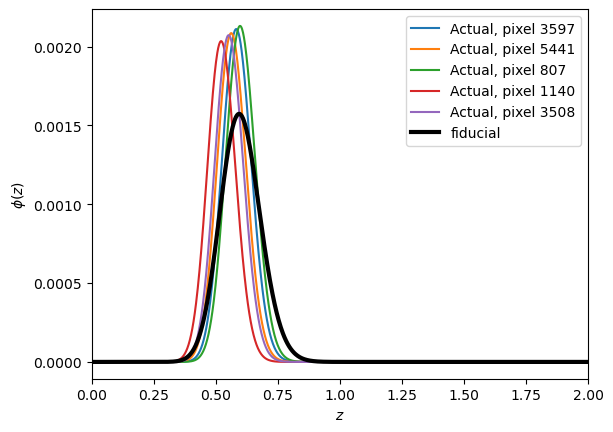

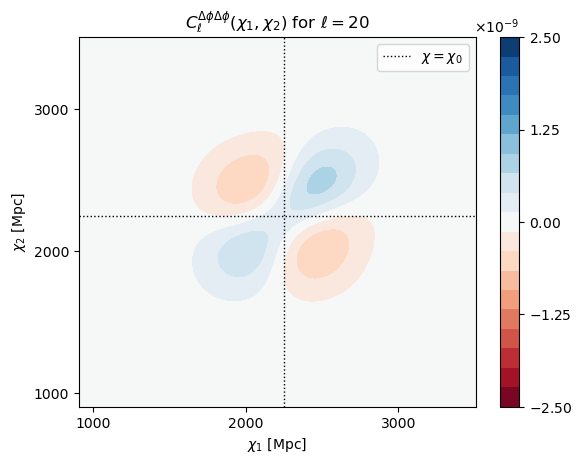

In [422]:
temp_exp.plot_realizations()
plt.show()
temp_exp.plot_ClDphi_vs_chi_chiprime_2D(20)

#### Scripts for parallelization

Let's write a script to compute the biases in parallel, using a different core/process for each $\ell$:

In [47]:
%%writefile /global/u1/a/ab2368/varying_dndzs/Varying_dndzs/scripts/compute_modecoupling_bias_in_parallel.py
#!/global/homes/a/ab2368/.conda/envs/varying_dndz python
import sys
sys.path.insert(0, '/global/homes/a/ab2368/varying_dndzs/Varying_dndzs/biases_code/')
import numpy as np
import biases

# Load scenario from file
sigma_zshifts = np.array([2, 1, 0.5, 0.1])*0.02703
nsides = np.array([8, 16, 32])

# Hyperparameters for numerical integration
num_processes = 1
miniter = 1000
maxiter = 5000
tol = 1e-11
lprime_max = 'none'

# The ells where we want to evaluate the spectra
ells = np.logspace(np.log10(50), np.log10(1500), 48, dtype=int)

count = 0
for sigma_zshift in sigma_zshifts:
    for nside in nsides:
        print('running with nside={}, sigma_zshift={}'.format(nside, sigma_zshift))
        filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_NOSMOOTHING_sigmazshift{}_nside{}'.format(sigma_zshift, nside)
        loaded_exp = biases.load_from_file(filename)
        loaded_exp.ells = ells
        if count==0:
            # In all these cases, the unbiased PS is the same, so we only calculate it once
            unbiased_clgg = biases.unbiased_term(loaded_exp, loaded_exp.ells, num_processes=num_processes, miniter=miniter, maxiter=maxiter, tol=tol)
        loaded_exp.unbiased_clgg = unbiased_clgg
        print('running with lprime_max={}'.format(lprime_max))
        
        # Compute full mode-coupling bias
        loaded_exp.conv_bias = biases.mode_coupling_bias(loaded_exp, loaded_exp.ells, lprime_max=lprime_max, num_processes=num_processes,
                                                         miniter=miniter, maxiter=maxiter, tol=tol)
        # Compute analytic approximations to mode-coupling bias
        loaded_exp.analytic_mcbias_toy_model = biases.mode_coupling_bias(loaded_exp, loaded_exp.ells, num_processes=num_processes, 
                                                                         miniter=miniter, maxiter=maxiter, tol=tol, mode='analytic_toy_model')
        loaded_exp.analytic_mcbias_via_variance = biases.mode_coupling_bias(loaded_exp, loaded_exp.ells, num_processes=num_processes, 
                                                                            miniter=miniter, maxiter=maxiter, tol=tol, mode='analytic_via_variance')

        # Compute additive bias
        loaded_exp.additive_bias = biases.additive_bias(loaded_exp, loaded_exp.ells, num_processes=num_processes, miniter=miniter, maxiter=maxiter, tol=tol)

        # Save to file, this time including the biases as an attribute!
        loaded_exp.save_properties(filename)
        print('done with {}'.format(filename))
        count += 1


Overwriting /global/u1/a/ab2368/varying_dndzs/Varying_dndzs/scripts/compute_modecoupling_bias_in_parallel.py


In [40]:
%%writefile /global/u1/a/ab2368/varying_dndzs/Varying_dndzs/scripts/compute_additive_bias_in_parallel.py
#!/global/homes/a/ab2368/.conda/envs/varying_dndz python
import sys
sys.path.insert(0, '/global/homes/a/ab2368/varying_dndzs/Varying_dndzs/biases_code/')
import numpy as np
import biases

# Load scenario from file
sigma_zshifts = np.array([0.1])*0.02703 #np.array([2, 1, 0.5, 0.1])*0.02703 #np.array([0.02703])
nsides = np.array([32])#np.array([8, 16, 32])

# Hyperparameters for numerical integration
num_processes = 1
miniter = 1000
maxiter = 5000
tol = 1e-11

for sigma_zshift in sigma_zshifts:
    for nside in nsides:
        filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_NOSMOOTHING_sigmazshift{}_nside'.format(sigma_zshift, nside)
        loaded_exp = biases.load_from_file(filename)

        # The ells where we want to evaluate the spectra
        loaded_exp.additive_ells = np.logspace(0, np.log10(200), 16, dtype=int)

        if hasattr(loaded_exp, 'additive_bias'):
            print("It looks like you've already computed the bias for this scenario. Please delete it from file you really want to re-rerun things.")
        else:
            loaded_exp.additive_bias = biases.additive_bias(loaded_exp, additive_ells.ells, num_processes=num_processes, miniter=miniter, maxiter=maxiter, tol=tol)

        # Save to file, this time including the biases as an attribute!
        loaded_exp.save_properties(filename)

Overwriting /global/u1/a/ab2368/varying_dndzs/Varying_dndzs/scripts/compute_additive_bias_in_parallel.py


#### Inspecting the outputs

We can now simply plot the biases we've computed

8 0.05406
16 0.05406
32 0.05406
8 0.02703
16 0.02703
32 0.02703
8 0.013515
16 0.013515
32 0.013515
8 0.002703
16 0.002703
32 0.002703


Text(0, 0.5, '$C_\\ell$')

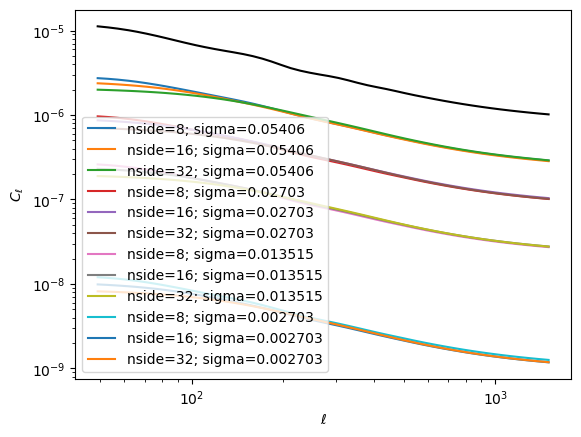

In [23]:
# Load scenario from file
for sigma_zshift in np.array([2, 1, 0.5, 0.1])*error_on_meanz:
    for nside in np.array([8, 16, 32]):
        print(nside, sigma_zshift)
        filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_NOSMOOTHING_sigmazshift{}_nside{}'.format(sigma_zshift, nside)
        loaded_exp = biases.load_from_file(filename)
        plt.loglog(loaded_exp.ells, loaded_exp.conv_bias, label='nside={}; sigma={}'.format(nside, sigma_zshift))

plt.loglog(loaded_exp.ells, loaded_exp.unbiased_clgg, 'k')

plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')

Text(0, 0.5, '$\\Delta C^{gg}_\\ell/ C^{gg}_\\ell$')

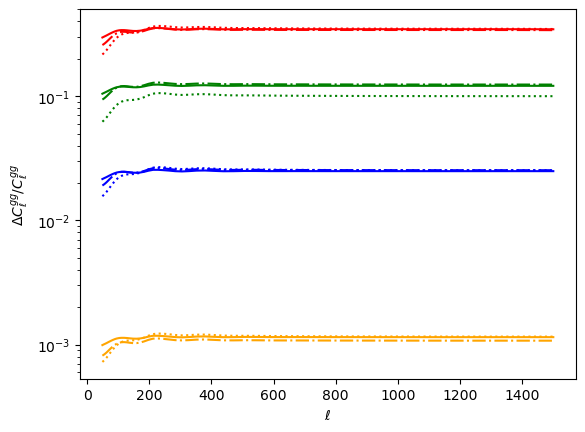

In [45]:
sigma_zshifts = np.array([2, 1, 0.5, 0.1])*error_on_meanz
sigma_zshift_labels = np.array([r'$2\,\sigma_{\chi_0}$', r'$\sigma_{\chi_0}$', r'$\sigma_{\chi_0}/2$', r'$\sigma_{\chi_0}/10$'])
sigma_zshift_colors = np.array(['r', 'g', 'b', 'orange'])
nsides = np.array([8, 16, 32])

for sigma_zshift, color, labels in zip(sigma_zshifts, sigma_zshift_colors, sigma_zshift_labels):
    for nside, ls in zip(nsides, np.array(['-', '-.', ':'])):
        filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_NOSMOOTHING_sigmazshift{}_nside{}'.format(sigma_zshift, nside)
        loaded_exp = biases.load_from_file(filename)
        plt.plot(loaded_exp.ells, loaded_exp.conv_bias/loaded_exp.unbiased_clgg,
                 color=color, ls=ls, label=r'{}'.format(labels))
        
        #plt.plot(loaded_exp.ells, loaded_exp.analytic_mcbias_via_variance/loaded_exp.unbiased_clgg, color=color, ls=ls, label=r'analytic_via_variance')

plt.yscale('log')
#plt.legend(ncol=len(sigma_zshifts))
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\Delta C^{gg}_\ell/ C^{gg}_\ell$')

These follow roughly the $\sigma_{\chi_0}^2$ dependence. Note that each of these curves is for a different realization (at a different nside), so we expect some scatter

(-0.05, 0.05)

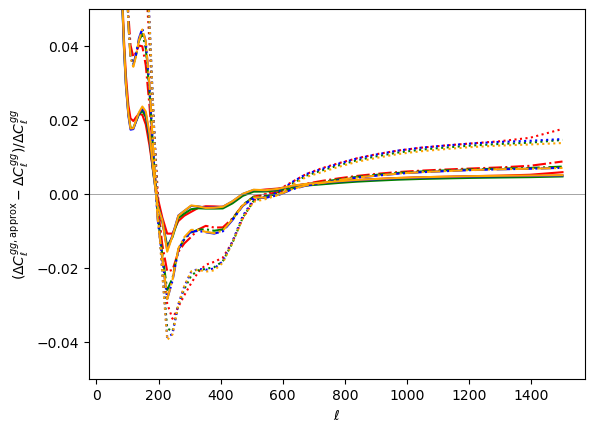

In [41]:
sigma_zshifts = np.array([2, 1, 0.5, 0.1])*error_on_meanz
sigma_zshift_labels = np.array([r'$2\,\sigma_{\chi_0}$', r'$\sigma_{\chi_0}$', r'$\sigma_{\chi_0}/2$', r'$\sigma_{\chi_0}/10$'])
sigma_zshift_colors = np.array(['r', 'g', 'b', 'orange'])
nsides = np.array([8, 16, 32])

for sigma_zshift, color, labels in zip(sigma_zshifts, sigma_zshift_colors, sigma_zshift_labels):
    for nside, ls in zip(nsides, np.array(['-', '-.', ':'])):
        filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_NOSMOOTHING_sigmazshift{}_nside{}'.format(sigma_zshift, nside)
        loaded_exp = biases.load_from_file(filename)
        plt.plot(loaded_exp.ells, (loaded_exp.analytic_mcbias_via_variance-loaded_exp.conv_bias)/loaded_exp.conv_bias,
                 color=color, ls=ls, label=r'{}'.format(labels))
plt.yscale('linear')
#plt.legend(ncol=len(sigma_zshifts))
plt.xlabel(r'$\ell$')
plt.ylabel(r'$(\Delta C^{gg, \mathrm{approx}}_\ell - \Delta C^{gg}_\ell)/ \Delta C^{gg}_\ell$')
plt.axhline(0, lw=0.5, color='gray')
#plt.xlim([np.min(loaded_exp.ells), np.max(loaded_exp.ells)])
plt.ylim([-0.05, 0.05])

Note that the approximation is just as good for any $\sigma_{\chi_0}^2$ given some nside. But the agreement worsens for higher nside, presumably because there is higher leakage of power, some of which we lose altogether because it falls above lprime_cut. If that's what's happening, we should see this as well if we compare the variance of the slices as we seed it against the variance we get by summing over $C_l^{\Delta \phi}(\chi)$

Text(0, 0.5, '$ [\\sum_\\ell (2\\ell+1)C_{\\ell}^{\\Delta \\phi}(\\chi)/(4 \\pi)] \\,/\\, \\mathrm{Var}(\\phi)(\\chi)$')

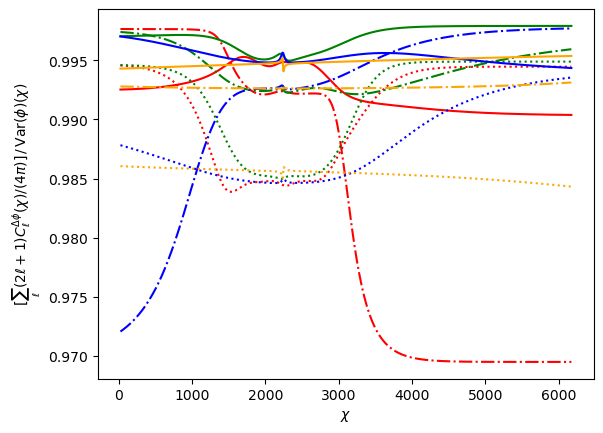

In [43]:
sigma_zshifts = np.array([2, 1, 0.5, 0.1])*error_on_meanz
sigma_zshift_labels = np.array([r'$2\,\sigma_{\chi_0}$', r'$\sigma_{\chi_0}$', r'$\sigma_{\chi_0}/2$', r'$\sigma_{\chi_0}/10$'])
sigma_zshift_colors = np.array(['r', 'g', 'b', 'orange'])
nsides = np.array([8, 16, 32])

for sigma_zshift, color, labels in zip(sigma_zshifts, sigma_zshift_colors, sigma_zshift_labels):
    for nside, ls in zip(nsides, np.array(['-', '-.', ':'])):
        filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_NOSMOOTHING_sigmazshift{}_nside{}'.format(sigma_zshift, nside)
        loaded_exp = biases.load_from_file(filename)
        
        # Measure the variance of each chi-slice directly
        var_direct = loaded_exp.variance_at_distance_slice
        
        # Calculate the variance from the Cl's
        ells = np.arange(loaded_exp.Cl_deltap_of_chi1_chi2.shape[0])
        var_via_cl = np.sum( (2*ells[:,None]+1)*np.diagonal(loaded_exp.Cl_deltap_of_chi1_chi2, axis1=1, axis2=2)/(4*np.pi), axis=0)
        
        plt.plot(loaded_exp.chi_array, var_via_cl/var_direct,
                 color=color, ls=ls, label=r'{}'.format(labels))
plt.xlabel(r'$\chi$')
plt.ylabel(r'$ [\sum_\ell (2\ell+1)C_{\ell}^{\Delta \phi}(\chi)/(4 \pi)] \,/\, \mathrm{Var}(\phi)(\chi)$')

Indeed, that's what we're seeing here